In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
sns.set(font_scale=2)

In [10]:
# # methods = ["uniform", "bald", "entropy", "bald_generative", "entropy_generative", "bald_duplicate", "entropy_duplicate", "bald_gan"]
# # methods = ["uniform", "bald", "bald_generative", "bald_gan"]
# # methods = ["uniform", "entropy", "entropy_generative", "entropy_gan"]
# # methods = ["entropy", "entropy_generative", "entropy_gan", "entropy_duplicate"]
# # methods = ["bald", "bald_generative", "bald_gan", "bald_duplicate"]
# labels = {
#     "uniform": "Uniform", 
#     "bald": "BALD w/o DA", 
#     "entropy": "Max Entropy w/o DA", 
#     "bald_generative": "BALD w VAE", 
#     "entropy_generative": "Max Entropy w VAE", 
#     "bald_gan": "BALD w VAEGAN",
#     "entropy_gan": "Max Entropy w VAEGAN",
#     "bald_duplicate": "BALD Duplicate",
#     "entropy_duplicate": "Max Entropy Duplicate"
# }
# location = "../perf_lists_final/"
# plt.figure(figsize=(15, 10))
# plt.xlabel("Acquisition Iterations")
# plt.ylabel("Test Accuracy")
# # plt.title("Test Accuracy Performance for Duplicated BALD Samples")
# # plt.title("Test Accuracy Performance for Duplicated Max Entropy Samples")
# # plt.title("Test Accuracy Performance for BALD")
# # plt.title("Test Accuracy Performance for Max Entropy")
# for method in methods:
#     with open (location + "mean/" + method) as f:
#         mean = [float(line.rstrip()) for line in f]
#     with open (location + "std/" + method) as f:
#         std = [float(line.rstrip()) for line in f]
# #     plt.errorbar(x=np.arange(101)+1, y=mean, yerr=std, label=labels[method])
#     plt.plot()
# plt.legend()
# # plt.savefig("../plots/test_acc_BALD.png")
# plt.savefig("../plots/test_acc_max_entropy.png")
# # plt.savefig("../plots/test_acc_max_entropy_duplicate.png")
# # plt.savefig("../plots/test_acc_BALD_duplicate.png")

In [11]:
def plot_cifar_entropy(cifar_plots_location):
    dirs = ["perf_lists_cifar", "perf_lists_cifar_vae"]
    labels = {
        "perf_lists_cifar": "Max Entropy w/o DA",
        "perf_lists_cifar_vae": "Max Entropy w VAE"
    }
    plt.figure(figsize=(15, 10))
    plt.title("Test Accuracy Performance for Max Entropy")
    plt.ylabel("Test Accuracy")
    plt.xlabel("Acquisition Iterations")
    
    with open(os.path.join(cifar_plots_location, "perf_lists_cifar", "uniform_perf_hist")) as f:
        uniform_val_accs = [float(line.rstrip()) for line in f]
        no_x_vals = len(uniform_val_accs)
        plt.plot(np.arange(no_x_vals), uniform_val_accs, label="Uniform")
    for dir_name in dirs:
        with open(os.path.join(cifar_plots_location, dir_name, "entropy_perf_hist")) as f:
            val_accs = [float(line.rstrip()) for line in f]
        no_x_vals = len(val_accs)
        plt.plot(np.arange(no_x_vals), val_accs, label=labels[dir_name])
    
    tran_cifar_res = np.load("../../cifar_max_entropy.npy")
    tran_cifar_res = tran_cifar_res[0].flatten()
#     tran_cifar_res = np.mean(tran_cifar_res, axis=0).flatten()
#     print(no_x_vals)
    tran_cifar_res /= 100
    plt.plot(np.arange(no_x_vals-1), tran_cifar_res, label="Max Entropy w jointly trained VAEGAN")
    plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: '..\\CIFAR\\perf_lists_cifar\\uniform_perf_hist'

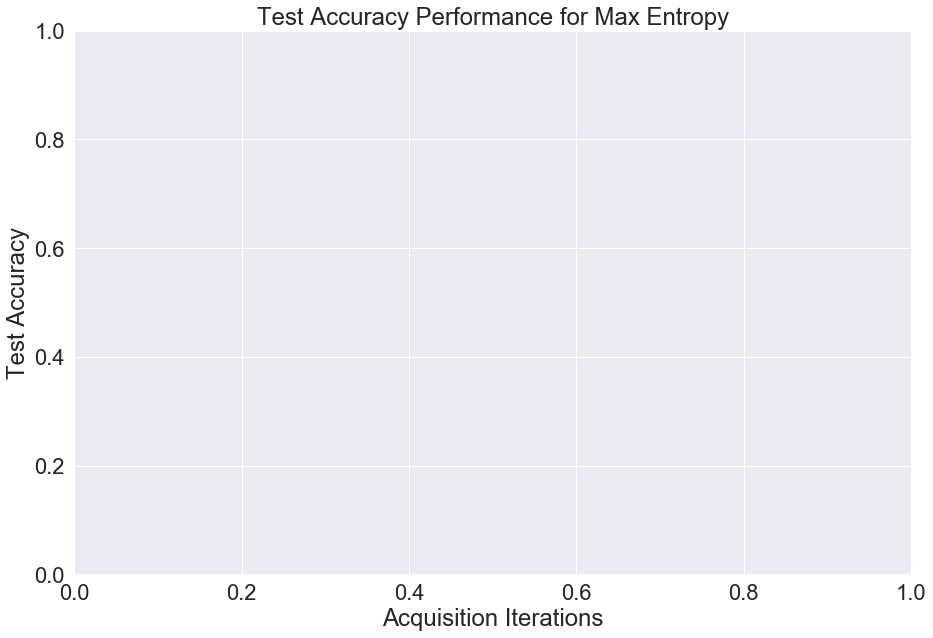

In [12]:
plot_cifar_entropy("..\\CIFAR\\")